<a href="https://colab.research.google.com/github/mingshey/python_mechanics/blob/main/Python%ED%95%B4%EC%84%9D%EC%97%AD%ED%95%99_003_%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%98_%EA%B8%B0%EC%B4%883_RK4_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analytical Mechanics with Python
# 파이썬으로 코딩하는 해석역학
## <Elective Tracks 2024 Summer Programme>

## 수치 모의 실험(simulation) 기초(3/3)


## 더 안정적이고 신뢰할 만한 시뮬레이션 방법은?

### Runge-Kutta method

일정 시간 간격 뒤의 운동 상태를 구하기 위해 시작점과 도착점에서 각각 한 번씩 구한 변화율과 중간점에서 구한 두 번의 변화율을 가중평균한 값을 실제 변화율로 삼아 나중 값을 구하는 방법입니다. 이 때, 중간점에서 구한 변화율 2 개는 양 끝에서 구한 변화율보다 각각 2배의 가중치를 줍니다.(Runge-Kutta method)

<img src='https://drive.google.com/uc?export=download&id=1M6j46c_zaeD0DxjUkee2doRjBFMHgRim' width="420" height ="" />

* 참고: [룽게-쿠타 방법](https://ko.wikipedia.org/wiki/%EB%A3%BD%EA%B2%8C-%EC%BF%A0%ED%83%80_%EB%B0%A9%EB%B2%95)

$ k_1 = f(t_n, S_n)$,

$k_2 = f(t_n + \dfrac{\Delta t}{2}, S_n + k_1 \dfrac{\Delta t}{2}),$

$k_3 = f(t_n + \dfrac{\Delta t}{2}, S_n + k_2 \dfrac{\Delta t}{2}),$

$k_4 = f(t_n + \Delta t, S_n + k_3 \Delta t),$

$ S_{n+1}= S_n + \dfrac{1}{6}\left(k_1 + 2 k_2 + 2 k_3 + k_4\right) \Delta t .$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
조화 진동자(용수철에 매달린 물체)의 운동
4th-order Runge-Kutta method
"""

v0 = 0.0
a = 1.0
t0 = 0.0
x0 = 1.0
tf=10.0
N=100
Delta_t = tf/N
k = 2
m = 0.5

def f(t, S):
  """
  dS/dt를 계산하여 반환하는 함수
  """
  x, v = S
  return np.array([v, -k/m*x])

def rk4step(dSdt, t, S, Delta_t):
  k1 = dSdt(t, S)
  k2 = dSdt(t + Delta_t / 2, S + k1 * Delta_t / 2)
  k3 = dSdt(t + Delta_t / 2, S + k2 * Delta_t / 2)
  k4 = dSdt(t + Delta_t    , S + k3 * Delta_t)
  S_next = S + (1/6)*(k1 + 2 * k2 + 2 * k3 + k4) * Delta_t
  t_next = t + Delta_t
  return (t_next, S_next)

t = t0
x = x0
v = v0

t_rk = np.array([t])
x_rk = np.array([x])
v_rk = np.array([v])
S = np.array([x, v])

for n in range(1, 121):
  t, S = rk4step(f, t, S, Delta_t)
  x, v = S

  t_rk = np.append(t_rk, t)
  x_rk = np.append(x_rk, x)
  v_rk = np.append(v_rk, v)

Text(0.5, 1.0, 'RK4 method')

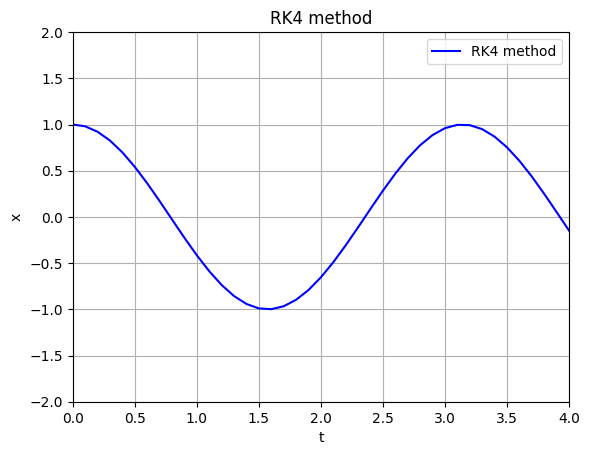

In [ ]:
plt.grid()
plt.plot(t_rk, x_rk, c='b', label="RK4 method")
plt.legend(loc="upper right")
plt.xlabel("t")
plt.ylabel("x")
plt.title("RK4 method")

In [ ]:
"""
운동 에너지(kinetic energy)
"""

KE_rk = 1/2 * m * np.array(v_rk) ** 2
"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""

PE_rk = 1/2 * k * np.array(x_rk) ** 2
"""
역학적 에너지(mechanical energy)
"""

ME_rk = KE_rk + PE_rk

Text(0.5, 1.0, 'RK4 method')

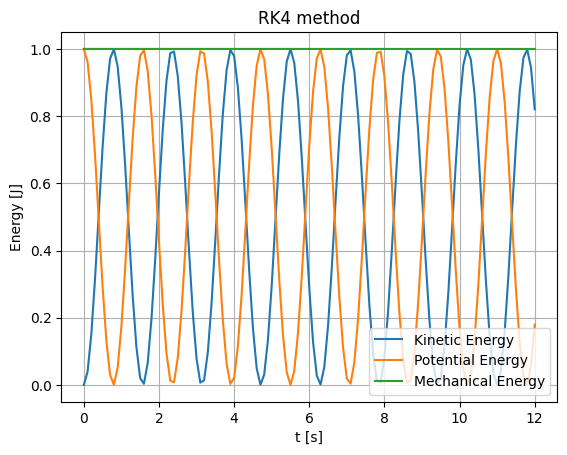

In [ ]:
plt.grid()
plt.plot(t_rk, KE_rk, label="Kinetic Energy")
plt.plot(t_rk, PE_rk, label="Potential Energy")
plt.plot(t_rk, ME_rk, label="Mechanical Energy")
plt.legend(loc="lower right")
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")
plt.title("RK4 method")

In [ ]:
relerr = (ME_rk[-1] - ME_rk[0])/ME_rk[0]
print(f'{relerr:.2e}')

-1.06e-04


### 미분방정식
자연 현상을 나타내는 물리 법칙들은 현재 상태가 어떻게 변화해 갈 것인가를 나타낸다. 즉 변화율이 어떤 값에 비례한다는 형태로, 그 값은  현재 상태와는 관계 없는 외적인 요인에 의해 결정되기도 하고, 현재 상태에 따라 결정되기도 한다.

어느 시점의 순간적인 변화율은 수학적으로는 미분으로 표현되므로 물리 법칙은 자연히 미분 값에 대한 방정식, 즉 **미분 방정식**으로 주어지는 사례가 많다.

해석 역학은 미분 방정식으로 주어진 물리 법칙을 중심으로 자연 현상을 살펴보고 그 결과를 찾아내는 일을 주제로 하는데, 본래 해석 역학은 미분방정식의 해석적 해를 구하는 것이 기본이지만 해석적 해만으로는 짐작하기 어려운 혼돈 현상이나 비 주기적 운동, 또는 삼체 문제와 같이 해석적으로 풀기 어려운 복잡한 미분 방정식 문제들이 있어서, 컴퓨터를 사용한 수치적 풀이를 통해 접근할 수밖에 없는 경우들이 많다.

본 강좌에서는 이와 같이 해석적 풀이만으로 접근하기 어려운 미분 방정식 문제를 파이썬 프로그래밍을 통해 수치적으로 푸는 방법을 소개한다.

첫 강의에서는 미분 방정식의 수치 해를 구하는 원리를 소개한다.

## 미분 방정식의 수치 해

* 1차 미분 방정식
$$ \frac{dx}{dt} = f(t, x) $$ 는 $x$의 변화율이 시간 $t$및 현재 $x$값에 따른 어떤 함수로 주어짐을 나타낸다. (이 함수는 상수 함수일 수도 있고, 실제로 변수 값에 따라 값이 달라지는 함수일 수도 있다.)
수치적 풀이에서는 이러한 미분 방정식을 차분 방정식 $$ \frac{\Delta x}{\Delta t} = \frac{x(t+\Delta t) - x(t)}{\Delta t} \approx f(t, x)$$로 근사하여
$$ x(t+\Delta t) = x(t) + f(t, x)\Delta t $$ 와 같이 x의 값을 한 단계씩 근삿값을 구해 나가는 방법을 사용한다.

* 2차 미분 방정식
$$ \frac{d^2 x}{dt^2} = g(t, x)$$은 곧이곧대로 비슷한 풀이를 구하려고 하면 훨씬 복잡해질 수 있다. 그러나 $$ \left\{\begin{align} \frac{dx}{dt} &= v(t), \\ \frac{dv}{dt} &= g(t, x)\end{align} \right.$$와 같이 $(x, v)$에 대한 두 개의 일차 미분 방정식으로 만들면 위에서와 같이 두 개의 차분 방정식
$$ \left\{\begin{align} \frac{\Delta x}{\Delta t} &= v(t_n), \\ \frac{\Delta v}{\Delta t} &= g(t_n, x_n)\end{align} \right.$$
으로 근사하여
$$ \left\{ \begin{align} x_{n+1} &= x_n + v(t_n)\Delta t, \\ v_{n+1} &= v_n + g(t_n, x_n)\Delta t \end{align}\right.$$
와 같이 동시에 수치 해를 구하는 방법을 쓸 수 있다.

지금까지 공부한 Euler 방법, Euler-Cromer 방법, mid-point 방법, Heun의 방법, 및 Runge-Kutta 방법들은 모두 이를 응용한 미분방정식의 수치 적분 방법들이다.

# scipy.integrate.solve_ivp 를 이용하는 방법

자주 사용하는 과학 기술용 알고리즘들은 오래 전부터 Fortran, MatLab, 등에 구현되어 있었고 이를 파이썬에서도 불러 쓸 수 있도록 패키지들이 마련되어 있습니다.

수치 적분 방법도 예외가 아니어서 scipy 패키지 안에는 표준화된 미분 방정식 풀이 루틴으로 odeint 와 solve_ivp 가 있습니다.

In [ ]:
from scipy.integrate import solve_ivp

In [ ]:
solve_ivp?

In [ ]:
# 사용 예:
tf = 10                         # 시간 구간 한계
S0 = (x0, v0)                   # 초기 상태 (위치, 속도) 등
tspan = (0, tf)                 # 시간 구간
N = 100                         # 시간 구간 분할 수
step_size = tf / N              # 시간 간격 최댓값을 제한하기 위해 max_step 인자로 사용
sim_method = "RK45"             # 시뮬레이션 방법
tlist = np.linspace(0, tf, N+1) # 결과를 출력할 시간 리스트

sol = solve_ivp(f, tspan, S0, sim_method, t_eval = tlist, max_step = step_size)

In [ ]:
sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-01 ...  9.900e+00  1.000e+01]
        y: [[ 1.000e+00  9.801e-01 ...  5.813e-01  4.081e-01]
            [ 0.000e+00 -3.973e-01 ... -1.627e+00 -1.826e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 620
     njev: 0
      nlu: 0

In [ ]:
sol.t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
len(sol.t)

101

In [ ]:
sol.y.shape

(2, 101)

In [ ]:
ts = sol.t
xs = sol.y[0]
vs = sol.y[1]

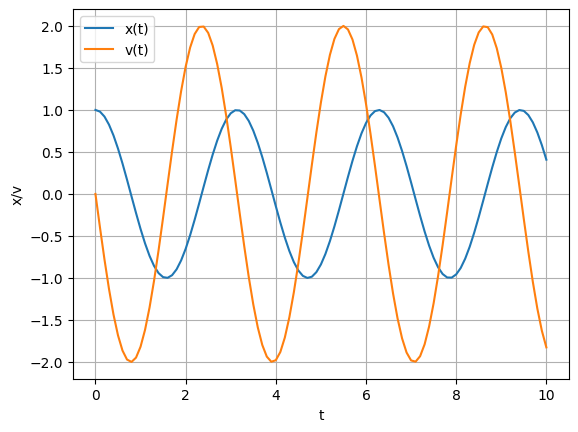

In [ ]:
plt.grid()
plt.xlabel("t")
plt.ylabel("x/v")
plt.plot(ts, xs, label = "x(t)")
plt.plot(ts, vs, label = "v(t)")
plt.legend()

In [ ]:
"""
운동 에너지(kinetic energy)
"""
KEs = 1/2 * m * np.array(vs) ** 2

"""
탄성 퍼텐셜 에너지(elastic potential energy)
"""
PEs = 1/2 * k * np.array(xs) ** 2

"""
역학적 에너지(mechanical energy)
"""
MEs = KEs + PEs

Text(0, 0.5, 'Energy [J]')

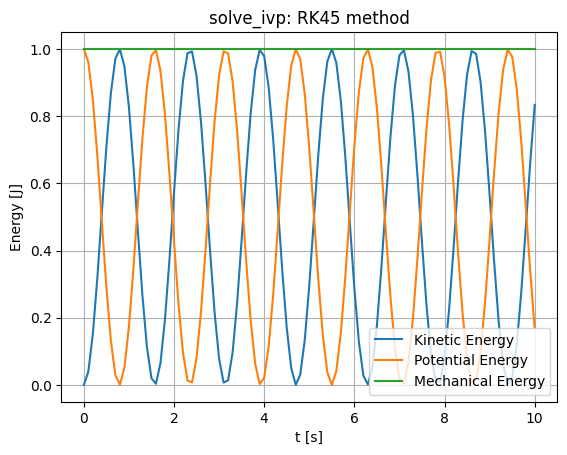

In [ ]:
plt.title("solve_ivp: RK45 method")
plt.grid()
plt.plot(ts, KEs, label="Kinetic Energy")
plt.plot(ts, PEs, label="Potential Energy")
plt.plot(ts, MEs, label="Mechanical Energy")
plt.legend(loc="lower right")
plt.xlabel("t [s]")
plt.ylabel("Energy [J]")

In [ ]:
relerr2 = (MEs[-1] - MEs[0])/MEs[0]
print('[역학적 에너지의 상대 오차]')
print(f'::tspan=(0, {tf:.1f} s), dt={step_size:.2f} s::')
print(f' solve_ivp with RK45: {np.abs(relerr2):.2e}')
print(f' homebrew RK4 {np.abs(relerr):.2e}')

[역학적 에너지의 상대 오차]
::tspan=(0, 10.0 s), dt=0.10 s::
 solve_ivp with RK45: 3.37e-06
 homebrew RK4 1.06e-04
